<a href="https://colab.research.google.com/github/Pavan-02-01/-OOPs-ML/blob/main/MV_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Canonical Correlations: [np.float64(0.9409689969606326), np.float64(0.12393688120739514)]


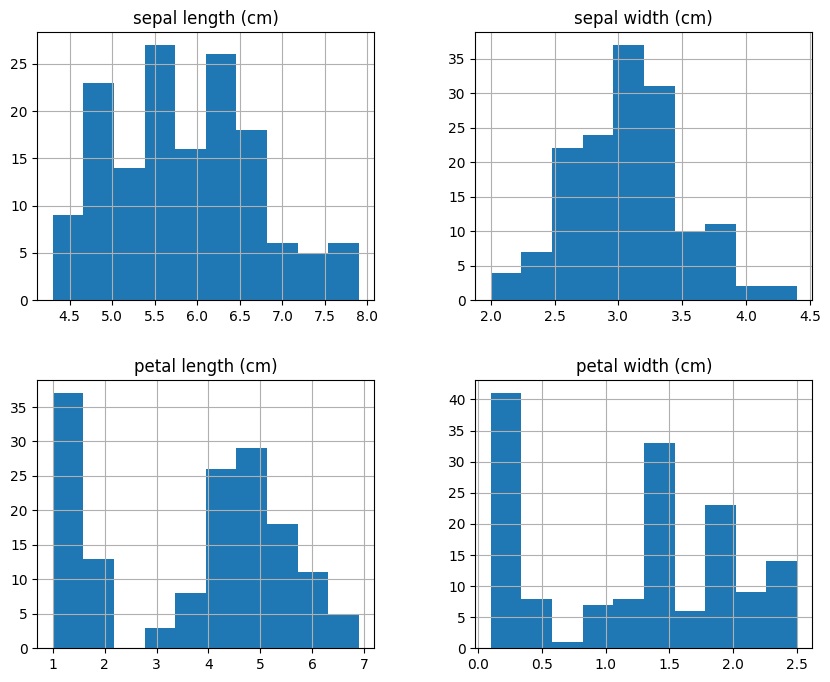

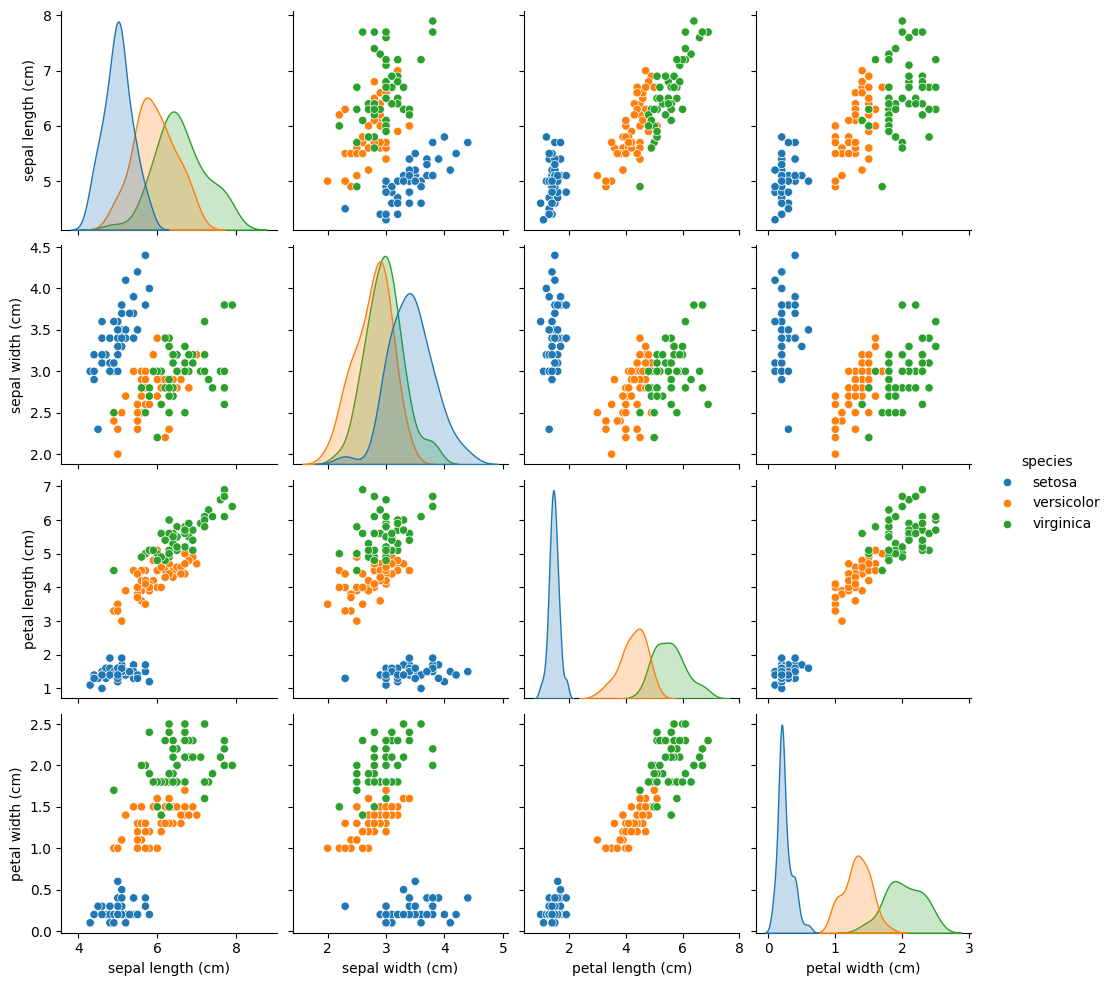

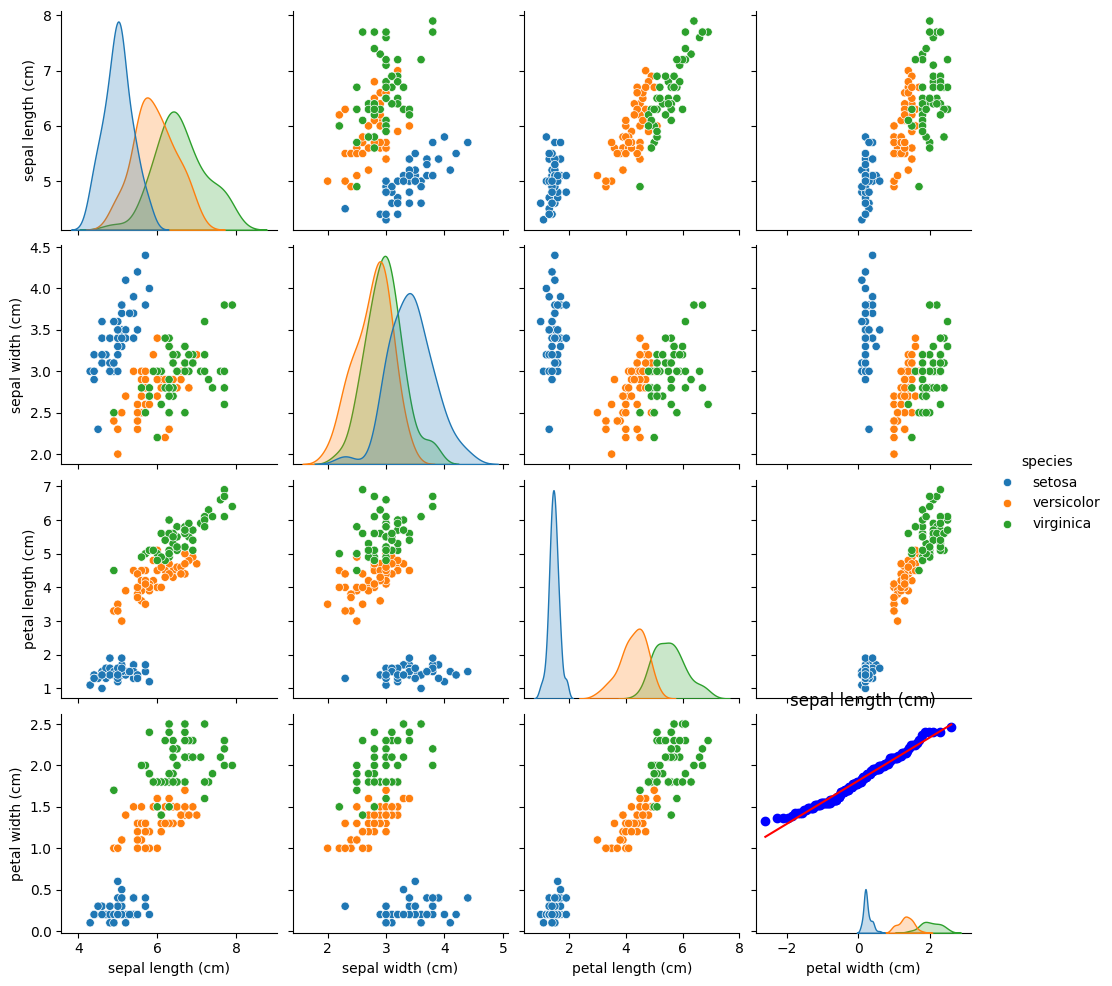

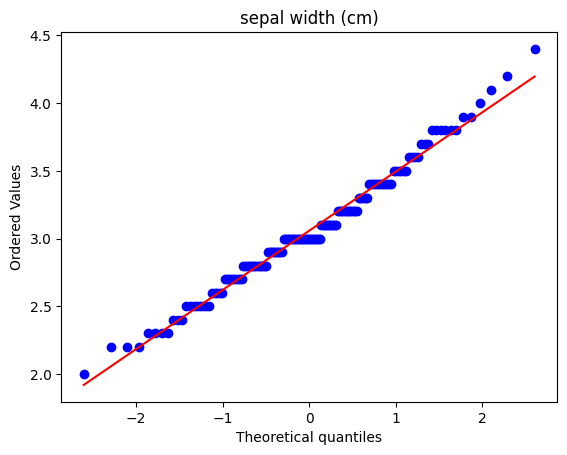

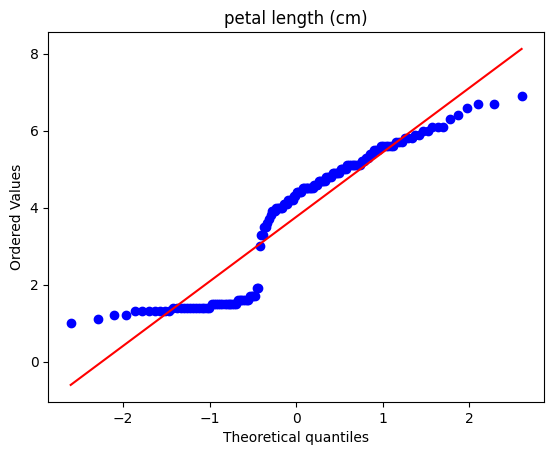

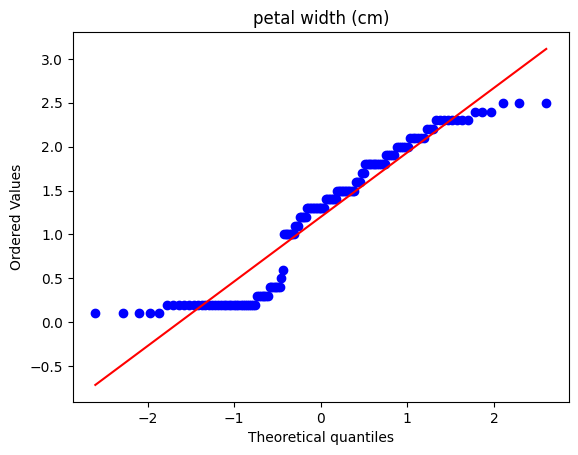

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
from sklearn.cross_decomposition import CCA

X = df[["sepal length (cm)", "sepal width (cm)"]]
Y = df[["petal length (cm)", "petal width (cm)"]]

cca = CCA(n_components=2)
cca.fit(X, Y)
X_c, Y_c = cca.transform(X, Y)

# Canonical correlations:
import numpy as np
correlations = [np.corrcoef(X_c[:, i], Y_c[:, i])[0,1] for i in range(2)]
print("Canonical Correlations:", correlations)
mean_vector = df.iloc[:, :4].mean()
cov_matrix = df.iloc[:, :4].cov()
corr_matrix = df.iloc[:, :4].corr()
df.hist(figsize=(10,8))
import seaborn as sns
sns.pairplot(df, hue="species")
sns.pairplot(df, hue="species")
import numpy as np

# Introduce missing values artificially
df_missing = df.copy()
df_missing.iloc[0:10, 1] = np.nan

# Method 1: Mean Imputation
df_mean_imputed = df_missing.fillna(df_missing.mean(numeric_only=True))

# Method 2: Listwise Deletion
df_dropped = df_missing.dropna()
from scipy.spatial import distance

X_num = df.iloc[:, :4]
mean_vec = X_num.mean().values
cov_matrix = np.cov(X_num.values, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mahalanobis_dist = X_num.apply(lambda x: distance.mahalanobis(x, mean_vec, inv_cov_matrix), axis=1)

# Threshold (Chi-square, dof=4 for four features):
from scipy.stats import chi2
threshold = chi2.ppf(0.99, df=4)
outliers = mahalanobis_dist > threshold

# Remove outliers
df_no_outliers = df.loc[~outliers]
import matplotlib.pyplot as plt
import scipy.stats as stats
for col in df.columns[:4]:
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)
    plt.show()